In [1]:
!wget http://www.manythings.org/anki/deu-eng.zip


--2021-06-06 19:49:55--  http://www.manythings.org/anki/deu-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.21.55.222, 172.67.173.198, 2606:4700:3036::ac43:adc6, ...
Connecting to www.manythings.org (www.manythings.org)|104.21.55.222|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8850403 (8.4M) [application/zip]
Saving to: ‘deu-eng.zip.1’

deu-eng.zip.1       100%[===================>]   8.44M  4.23MB/s    in 2.0s    

2021-06-06 19:49:57 (4.23 MB/s) - ‘deu-eng.zip.1’ saved [8850403/8850403]



In [2]:
!unzip deu-eng.zip


Archive:  deu-eng.zip
replace deu.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: deu.txt                 
replace _about.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: _about.txt              


In [3]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
%matplotlib inline

In [4]:
def read_text(filename):
  file=open(filename,encoding="utf-8",mode="rt")
  text=file.read()
  file.close()
  return text

In [5]:
def to_lines(text):
  pairs=  text.strip().split("\n")
  sents=[p.split("\t") for p in pairs]
  return sents

In [6]:
data=read_text("deu.txt")

In [7]:
deu_eng=to_lines(data)

In [8]:
deu_eng=np.array(deu_eng)

In [9]:
deu_eng[0]

array(['Go.', 'Geh.',
       'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
      dtype='<U537')

In [10]:
len(deu_eng)

235901

In [11]:
deu_eng=deu_eng[:50000,:]

In [12]:
deu_eng[:2]

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)']],
      dtype='<U537')

In [13]:
#remove punctuation

import string

deu_eng[:,0]=[s.translate(str.maketrans("","",string.punctuation)) for s in deu_eng[:,0]]
deu_eng[:,1]=[s.translate(str.maketrans("","",string.punctuation)) for s in deu_eng[:,1]]

#first parameter we want to replace any character second parameter is repalce with whom

In [14]:
deu_eng[:3]

array([['Go', 'Geh',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi', 'Hallo',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi', 'Grüß Gott',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)']],
      dtype='<U537')

In [15]:
for i in range(len(deu_eng)):
  deu_eng[i,0]=deu_eng[i,0].lower()
  deu_eng[i,1]=deu_eng[i,1].lower()

In [16]:
deu_eng[:3]


array([['go', 'geh',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['hi', 'hallo',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['hi', 'grüß gott',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)']],
      dtype='<U537')

In [17]:
eng_len=[len(s.split())for s in deu_eng[:,0]]
deu_len=[len(s.split())for s in deu_eng[:,1]]


In [18]:
lengths_df=pd.DataFrame({"eng":eng_len,"deu":deu_len})

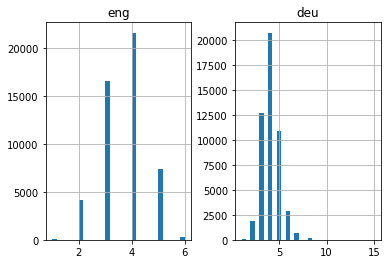

In [19]:
lengths_df.hist(bins=30)
plt.show()

In [20]:
max(eng_len),max(deu_len)

(6, 15)

In [21]:
from keras.preprocessing.text import Tokenizer

In [22]:
from keras.preprocessing.sequence import pad_sequences

In [23]:
eng_tokenizer=Tokenizer()
eng_tokenizer.fit_on_texts(deu_eng[:,0])
eng_tokenizer.word_index #word_index is dictonary  where it compute what should be index



{'tom': 1,
 'i': 2,
 'you': 3,
 'is': 4,
 'a': 5,
 'it': 6,
 'the': 7,
 'to': 8,
 'im': 9,
 'me': 10,
 'do': 11,
 'that': 12,
 'was': 13,
 'this': 14,
 'he': 15,
 'we': 16,
 'are': 17,
 'my': 18,
 'have': 19,
 'dont': 20,
 'your': 21,
 'did': 22,
 'its': 23,
 'not': 24,
 'like': 25,
 'can': 26,
 'youre': 27,
 'go': 28,
 'be': 29,
 'were': 30,
 'here': 31,
 'in': 32,
 'what': 33,
 'she': 34,
 'very': 35,
 'now': 36,
 'they': 37,
 'know': 38,
 'ill': 39,
 'on': 40,
 'has': 41,
 'isnt': 42,
 'cant': 43,
 'thats': 44,
 'want': 45,
 'up': 46,
 'for': 47,
 'how': 48,
 'get': 49,
 'need': 50,
 'toms': 51,
 'come': 52,
 'no': 53,
 'too': 54,
 'at': 55,
 'why': 56,
 'good': 57,
 'who': 58,
 'of': 59,
 'him': 60,
 'help': 61,
 'one': 62,
 'will': 63,
 'us': 64,
 'please': 65,
 'out': 66,
 'all': 67,
 'got': 68,
 'just': 69,
 'his': 70,
 'love': 71,
 'there': 72,
 'well': 73,
 'home': 74,
 'mary': 75,
 'really': 76,
 'see': 77,
 'with': 78,
 'didnt': 79,
 'stop': 80,
 'look': 81,
 'am': 82,
 'car

In [24]:
eng_vocab_size=len(eng_tokenizer.word_index)+1  # +1 for that start word 

In [25]:
print(eng_vocab_size)

6178


In [26]:
deu_tokenizer=Tokenizer()
deu_tokenizer.fit_on_texts(deu_eng[:,1])
deu_tokenizer.word_index #word_index is dictonary  where it compute what should be index

deu_vocab_size=len(deu_tokenizer.word_index)+1  # +1 for that start word 
print(deu_vocab_size)


10177


In [27]:
eng_max_length=8
deu_max_length=8

In [28]:
def encode_sequence(tokenizer,length,lines):
  
  seq=tokenizer.texts_to_sequences(lines) #eachof word in the sentences  into numeric token

  seq=pad_sequences(seq,maxlen=length,padding="post")
  return seq

In [29]:
from sklearn.model_selection import train_test_split


train,test=train_test_split(deu_eng,test_size=0.2, random_state=21)



In [30]:
train[:3]

array([['is it cancer', 'ist es krebs',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2248444 (CK) & #7456486 (Yorwba)'],
       ['prepare yourself', 'mache dich bereit',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #1582029 (Spamster) & #1600407 (Pfirsichbaeumchen)'],
       ['tom wears glasses', 'tom trägt eine brille',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #3265979 (patgfisher) & #2707984 (Pfirsichbaeumchen)']],
      dtype='<U537')

In [31]:
trainX = encode_sequence(deu_tokenizer,deu_max_length,train[:,1])
trainY = encode_sequence(eng_tokenizer,eng_max_length,train[:,0])
print(trainX.shape,trainY.shape)

(40000, 8) (40000, 8)


In [32]:
print(trainX[0])

[   3    7 1517    0    0    0    0    0]


In [33]:
print(trainY[0]
      )

[   4    6 1031    0    0    0    0    0]


In [34]:
testX=encode_sequence(deu_tokenizer,deu_max_length,test[:,1])
testY=encode_sequence(eng_tokenizer,eng_max_length,test[:,0])
print(testX.shape,testY.shape)

(10000, 8) (10000, 8)


In [35]:
#build the model

In [36]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,RepeatVector
from keras import optimizers
from keras.callbacks import ModelCheckpoint

In [44]:
model=Sequential()
model.add(Embedding(deu_vocab_size,512,input_length=deu_max_length,mask_zero=True))

#mask_zero means we are using special value zero as padding
#all of the following layer also suppport mask_zero
model.add(LSTM(512))
model.add(RepeatVector(eng_max_length))
model.add(LSTM(512,return_sequences=True))
model.add(Dense(eng_vocab_size,activation="softmax"))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 8, 512)            5210624   
_________________________________________________________________
lstm_4 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 8, 512)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 8, 512)            2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 8, 6178)           3169314   
Total params: 12,578,338
Trainable params: 12,578,338
Non-trainable params: 0
_________________________________________________________________


In [46]:
rms=optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms,loss="sparse_categorical_crossentropy")  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [47]:
# checkpoint
filename="model.h1.2021"
checkpoint=ModelCheckpoint(filename,
                           monitor="val_loss",
                           mode="min",
                           save_best_only=True,
                           verbose=1)

In [48]:
trainX.shape,trainY.shape

((40000, 8), (40000, 8))

In [49]:
history=model.fit(trainX,trainY.reshape(40000,8,1),
                  epochs=30,
                  batch_size=512,
                  validation_split=0.2,
                  callbacks=[checkpoint],
                  verbose=1)

Epoch 1/30
63/63 [==============================] - 12s 100ms/step - loss: 4.3274 - val_loss: 2.7697

Epoch 00001: val_loss improved from inf to 2.76965, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 2/30
63/63 [==============================] - 5s 75ms/step - loss: 2.7641 - val_loss: 2.6739

Epoch 00002: val_loss improved from 2.76965 to 2.67387, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 3/30
63/63 [==============================] - 5s 75ms/step - loss: 2.6063 - val_loss: 2.5182

Epoch 00003: val_loss improved from 2.67387 to 2.51820, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 4/30
63/63 [==============================] - 5s 76ms/step - loss: 2.4098 - val_loss: 2.3611

Epoch 00004: val_loss improved from 2.51820 to 2.36110, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 5/30
63/63 [==============================] - 5s 77ms/step - loss: 2.2595 - val_loss: 2.2408

Epoch 00005: val_loss improved from 2.36110 to 2.24085, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 6/30
63/63 [==============================] - 5s 77ms/step - loss: 2.1047 - val_loss: 2.1378

Epoch 00006: val_loss improved from 2.24085 to 2.13777, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 7/30
63/63 [==============================] - 5s 78ms/step - loss: 1.9811 - val_loss: 2.0445

Epoch 00007: val_loss improved from 2.13777 to 2.04448, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 8/30
63/63 [==============================] - 5s 78ms/step - loss: 1.8580 - val_loss: 1.9534

Epoch 00008: val_loss improved from 2.04448 to 1.95335, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 9/30
63/63 [==============================] - 5s 79ms/step - loss: 1.7469 - val_loss: 1.8854

Epoch 00009: val_loss improved from 1.95335 to 1.88539, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 10/30
63/63 [==============================] - 5s 77ms/step - loss: 1.6448 - val_loss: 1.8313

Epoch 00010: val_loss improved from 1.88539 to 1.83134, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 11/30
63/63 [==============================] - 5s 77ms/step - loss: 1.5384 - val_loss: 1.7426

Epoch 00011: val_loss improved from 1.83134 to 1.74263, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 12/30
63/63 [==============================] - 5s 78ms/step - loss: 1.4370 - val_loss: 1.6889

Epoch 00012: val_loss improved from 1.74263 to 1.68891, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 13/30
63/63 [==============================] - 5s 78ms/step - loss: 1.3479 - val_loss: 1.6104

Epoch 00013: val_loss improved from 1.68891 to 1.61041, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 14/30
63/63 [==============================] - 5s 78ms/step - loss: 1.2559 - val_loss: 1.5837

Epoch 00014: val_loss improved from 1.61041 to 1.58372, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 15/30
63/63 [==============================] - 5s 77ms/step - loss: 1.1779 - val_loss: 1.5290

Epoch 00015: val_loss improved from 1.58372 to 1.52895, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 16/30
63/63 [==============================] - 5s 78ms/step - loss: 1.0984 - val_loss: 1.5079

Epoch 00016: val_loss improved from 1.52895 to 1.50794, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 17/30
63/63 [==============================] - 5s 78ms/step - loss: 1.0265 - val_loss: 1.4479

Epoch 00017: val_loss improved from 1.50794 to 1.44787, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 18/30
63/63 [==============================] - 5s 78ms/step - loss: 0.9571 - val_loss: 1.4267

Epoch 00018: val_loss improved from 1.44787 to 1.42666, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 19/30
63/63 [==============================] - 5s 78ms/step - loss: 0.8848 - val_loss: 1.3894

Epoch 00019: val_loss improved from 1.42666 to 1.38943, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 20/30
63/63 [==============================] - 5s 77ms/step - loss: 0.8252 - val_loss: 1.3567

Epoch 00020: val_loss improved from 1.38943 to 1.35669, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 21/30
63/63 [==============================] - 5s 77ms/step - loss: 0.7616 - val_loss: 1.3399

Epoch 00021: val_loss improved from 1.35669 to 1.33991, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 22/30
63/63 [==============================] - 5s 78ms/step - loss: 0.7102 - val_loss: 1.3232

Epoch 00022: val_loss improved from 1.33991 to 1.32321, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 23/30
63/63 [==============================] - 5s 78ms/step - loss: 0.6540 - val_loss: 1.3054

Epoch 00023: val_loss improved from 1.32321 to 1.30541, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 24/30
63/63 [==============================] - 5s 78ms/step - loss: 0.6008 - val_loss: 1.2822

Epoch 00024: val_loss improved from 1.30541 to 1.28219, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 25/30
63/63 [==============================] - 5s 78ms/step - loss: 0.5467 - val_loss: 1.2780

Epoch 00025: val_loss improved from 1.28219 to 1.27799, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 26/30
63/63 [==============================] - 5s 78ms/step - loss: 0.5056 - val_loss: 1.2589

Epoch 00026: val_loss improved from 1.27799 to 1.25889, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 27/30
63/63 [==============================] - 5s 82ms/step - loss: 0.4601 - val_loss: 1.2559

Epoch 00027: val_loss improved from 1.25889 to 1.25593, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 28/30
63/63 [==============================] - 5s 79ms/step - loss: 0.4265 - val_loss: 1.2441

Epoch 00028: val_loss improved from 1.25593 to 1.24412, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 29/30
63/63 [==============================] - 5s 79ms/step - loss: 0.3874 - val_loss: 1.2378

Epoch 00029: val_loss improved from 1.24412 to 1.23779, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


Epoch 30/30
63/63 [==============================] - 5s 79ms/step - loss: 0.3514 - val_loss: 1.2334

Epoch 00030: val_loss improved from 1.23779 to 1.23335, saving model to model.h1.2021


INFO:tensorflow:Assets written to: model.h1.2021/assets


INFO:tensorflow:Assets written to: model.h1.2021/assets


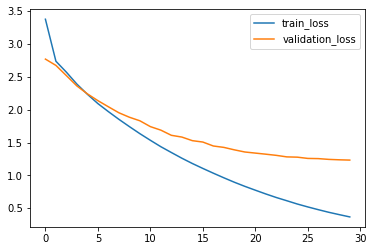

In [51]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train_loss","validation_loss"])
plt.show()

In [53]:
from keras.models import load_model

In [54]:
print(testX.shape)

(10000, 8)


In [55]:
model=load_model(filename)  #model.h1.2021
preds=model.predict_classes(testX)  #size of o/p of dense layer after appllying softmax is about 6000


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [61]:
preds[1]

array([  3, 268,   6,   0,   0,   0,   0,   0])

In [57]:
#we get token and want to get words

eng_dict={t:w for w ,t in eng_tokenizer.word_index.items()}

In [60]:
eng_dict

{1: 'tom',
 2: 'i',
 3: 'you',
 4: 'is',
 5: 'a',
 6: 'it',
 7: 'the',
 8: 'to',
 9: 'im',
 10: 'me',
 11: 'do',
 12: 'that',
 13: 'was',
 14: 'this',
 15: 'he',
 16: 'we',
 17: 'are',
 18: 'my',
 19: 'have',
 20: 'dont',
 21: 'your',
 22: 'did',
 23: 'its',
 24: 'not',
 25: 'like',
 26: 'can',
 27: 'youre',
 28: 'go',
 29: 'be',
 30: 'were',
 31: 'here',
 32: 'in',
 33: 'what',
 34: 'she',
 35: 'very',
 36: 'now',
 37: 'they',
 38: 'know',
 39: 'ill',
 40: 'on',
 41: 'has',
 42: 'isnt',
 43: 'cant',
 44: 'thats',
 45: 'want',
 46: 'up',
 47: 'for',
 48: 'how',
 49: 'get',
 50: 'need',
 51: 'toms',
 52: 'come',
 53: 'no',
 54: 'too',
 55: 'at',
 56: 'why',
 57: 'good',
 58: 'who',
 59: 'of',
 60: 'him',
 61: 'help',
 62: 'one',
 63: 'will',
 64: 'us',
 65: 'please',
 66: 'out',
 67: 'all',
 68: 'got',
 69: 'just',
 70: 'his',
 71: 'love',
 72: 'there',
 73: 'well',
 74: 'home',
 75: 'mary',
 76: 'really',
 77: 'see',
 78: 'with',
 79: 'didnt',
 80: 'stop',
 81: 'look',
 82: 'am',
 83: 

In [63]:
eng_preds=[]
for p in preds:
  sent=[]
  for t in p:
    if t>0:
      w=eng_dict.get(t)
      sent.append(w)
    
  eng_preds.append(" ".join(sent))

In [67]:
perds_df=pd.DataFrame({"actual_eng_words":test[:,0],"actual_german_words":test[:,1],"predicted_eng_words":eng_preds})

In [69]:
perds_df[:15]

,actual_eng_words,actual_german_words,predicted_eng_words
0,weve all done it,wir haben es alle geschafft,we all did it
1,you guys messed up,ihr habt es vermasselt,you tried it
2,we were clueless,wir waren ahnungslos,we were stranded
3,im still hungry,ich habe immer noch hunger,im always hungry
4,you lied to me again,du hast mich schon wieder angelogen,you lied to me me
5,tom was exhausted,tom war erschöpft,tom was loud
6,tom slept in the car,tom schlief im auto,tom slept in the car
7,tom looks sleepy,tom sieht müde aus,tom looks tired
8,we met at a party,wir haben uns auf einem fest kennengelernt,we met up a
9,you cant buy that,das kann man nicht kaufen,you cant buy this


In [64]:
#deu_dict.wrd_index me se words ka index lelo or or index ko model.predict me de do 
# or phir same vector to word